#Shariq Mian CIS3120

In [ ]:
pip install sodapy

In [ ]:
#Imported all the libraries for the project.
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests, json
from sodapy import Socrata

In [ ]:
#url for the precinct in NYC
url= "https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page"
page = requests.get(url)

In [ ]:
#pasing the HTML
precinct_list= BeautifulSoup(page.content,'html.parser')

In [ ]:
#showing HTML in better format so we can search for table.
precinct_list.prettify

In [ ]:
#printed all the data under div table
precinct_list_Table=precinct_list.find('table',class_='rt')
print(precinct_list_Table)

In [ ]:
#creating an empty list which will be ammended later to create Data Frame.
L1=[]
L2=[]
L3=[]

In [ ]:
#Using loop to seatch for text in tr and td tags. 
for row in precinct_list_Table.findAll('tr'):
  cells=row.findAll('td')
  if len(cells)== 3:
    #Adding the data to to the list.
    L1.append(cells[0].text.strip("\n"))
    L2.append(cells[2].find(text=True).rstrip("\n"))
    L3.append(cells[1].find(text=True).rstrip("\n"))

In [ ]:
#Creating DF from the list below.
precinct_list_df=pd.DataFrame()
precinct_list_df["Precinct_name"]    =L1
precinct_list_df["Address"]          =L2
precinct_list_df["Phone"]            =L3

In [ ]:
print(precinct_list_df)

In [ ]:
#Here I am converting cleaning up the data to extract the numbers from the Precinct name. Ex. remove 2 from "2nd Precinct" 
precinct_list_df["Precinct_name"]=precinct_list_df["Precinct_name"].astype("str")
precinct_list_df["Precinct_name"]=precinct_list_df["Precinct_name"].str.split(" ",expand=True,)
#Ex. removing ordinals from the data. 
precinct_list_df["Precinct_name"]=precinct_list_df["Precinct_name"].str.rstrip('st''th''nd''rd''midtow''central')
precinct_list_df["Precinct_name"]=precinct_list_df[~precinct_list_df["Precinct_name"].isin(['M'])]
precinct_list_df["Precinct_name"]=precinct_list_df[~precinct_list_df["Precinct_name"].isin(['C'])]
precinct_list_df["Precinct_name"]=precinct_list_df["Precinct_name"].astype("str")
#Converting data into string to change 1 to 01 ans so on for JSON when searching for specifing precinct. 
precinct_list_df["Precinct_name"]=precinct_list_df["Precinct_name"].apply(lambda x: x.zfill(3))

In [ ]:
print(precinct_list_df)

In [ ]:
#Creating a list from data frame (precinct_)
AllB_Precinct_List_df=precinct_list_df.iloc[00:75,0]

In [ ]:
AllB_Precinct_List_df=AllB_Precinct_List_df.astype("str")

In [ ]:
#Creating a list
my_List=AllB_Precinct_List_df.values.tolist()
print(my_List)

['001', '005', '006', '007', '009', '010', '013', 'nan', '017', 'nan', '019', '020', 'nan', '023', '024', '025', '026', '028', '030', '032', '033', '034', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '052', '060', '061', '062', '063', '066', '067', '068', '069', '070', '071', '072', '073', '075', '076', '077', '078', '079', '081', '083', '084', '088', '090', '094', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '120', '121']


NYC OpenData API

In [ ]:
#Below I will be using the NYC Open Data API for "Open Parking and Camera Violations"
#Below is the URL. It uses SoQL for quering the data. The result are in JSON array instead of JSON objects.
data_url='data.cityofnewyork.us'  
#Specifying the specific Data set. I will be working on the Dept. of Finance Data Set.
data_set='nc67-uf89'   
#Below is the API token.
app_token='HqWNQRcu9EhzUbVY0BoT0PH0P'   
#this API uses Socrata in the syntex below. 
url = Socrata(data_url,app_token) 
#Below is an example of a sinlgle full Query through JSON with no filters.
JSON_Query= url.get(data_set,limit=1)
print(JSON_Query)

[{'plate': 'DFXG46', 'state': 'FL', 'license_type': 'PAS', 'summons_number': '1411231648', 'issue_date': '07/19/2016', 'violation_time': '09:50A', 'violation': 'NO PARKING-STREET CLEANING', 'fine_amount': '45', 'penalty_amount': '0', 'interest_amount': '0', 'reduction_amount': '45', 'payment_amount': '0', 'amount_due': '0', 'precinct': '043', 'county': 'BX', 'issuing_agency': 'DEPARTMENT OF SANITATION', 'violation_status': 'HEARING HELD-NOT GUILTY', 'summons_image': {'url': 'http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VFZSUmVFMVVTWHBOVkZrd1QwRTlQUT09&locationName=_____________________', 'description': 'View Summons'}}]


In [ ]:
#Here I am doing a general query, however I am filtering only FIRE HYDRANT violations or tikcets which have interest due sorted by the interest due amount.
#I am using this query for my data.
JSON_results = url.get(data_set,where= "violation='FIRE HYDRANT' AND interest_amount>0 AND precinct>'010'", order="interest_amount DESC", limit=1000)
print(JSON_results)

[{'plate': 'CBP6918', 'state': 'NY', 'license_type': 'PAS', 'summons_number': '7179090232', 'issue_date': '11/09/2010', 'violation_time': '11:27P', 'violation': 'FIRE HYDRANT', 'judgment_entry_date': '02/06/2014', 'fine_amount': '495', 'penalty_amount': '0', 'interest_amount': '303.77', 'reduction_amount': '0', 'payment_amount': '0', 'amount_due': '798.77', 'precinct': '062', 'county': 'K', 'issuing_agency': 'TRAFFIC', 'violation_status': 'HEARING HELD-REINSTATEMENT', 'summons_image': {'url': 'http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VG5wRk0wOVVRVFZOUkVsNlRXYzlQUT09&locationName=_____________________', 'description': 'View Summons'}}, {'plate': 'CBP6918', 'state': 'NY', 'license_type': 'PAS', 'summons_number': '7256702048', 'issue_date': '10/01/2010', 'violation_time': '08:48A', 'violation': 'FIRE HYDRANT', 'judgment_entry_date': '02/06/2014', 'fine_amount': '495', 'penalty_amount': '0', 'interest_amount': '303.77', 'reduction_amount': '0', 'payment_amount': '0', 'amount_du

In [ ]:
#Below are example of a sinlgle Query through JSON.
Query1 = url.get(data_set, select="precinct, violation, fine_amount, interest_amount, issuing_agency", where= "interest_amount>0 AND precinct='100'" , order="fine_amount DESC",  limit=1)
print(Query1)
Query2 = url.get(data_set, select="precinct, violation, fine_amount, interest_amount, issuing_agency", where="precinct='000' AND interest_amount>0",order="interest_amount DESC",  limit=1)
print(Query2)

[{'precinct': '100', 'violation': 'NO PARKING-EXC. HNDICAP PERMIT', 'fine_amount': '180', 'interest_amount': '109.24', 'issuing_agency': 'POLICE DEPARTMENT'}]
[{'precinct': '000', 'violation': 'DOUBLE PARKING', 'fine_amount': '50', 'interest_amount': '249.38', 'issuing_agency': 'TRAFFIC'}]


In [ ]:
#To create many Queries, I have to create a for loop.  
new_list1=[]
new_list2=[]
new_list3=[]
new_list4=[]
new_list5=[]
#Below is the loop for the queries. I am seperating the result into lists so i can create Data Frame
#Below was refrenced from https://stackoverflow.com.
for jsonResult in JSON_results:
    if jsonResult['precinct'] in  my_List:
         print(f"{jsonResult['precinct']},{jsonResult['violation']},{jsonResult['fine_amount']},{jsonResult['interest_amount']},{jsonResult['issuing_agency']}")
         #I am seperating the result into lists so I can create Data Frame
         new_list1.append(f"{jsonResult['precinct']}")
         new_list2.append(f"{jsonResult['violation']}")
         new_list3.append(f"{jsonResult['fine_amount']}")
         new_list4.append(f"{jsonResult['interest_amount']}")
         new_list5.append(f"{jsonResult['issuing_agency']}")
#printing each list which will be converted as individual columns.
print(new_list1)
print(new_list2)
print(new_list3)
print(new_list4)
print(new_list5)



In [ ]:
#Converting the 5 list to Fines_df, containing 5 columns
Fines_df=pd.DataFrame()
Fines_df["Precinct_name"]    =new_list1
Fines_df["Violation"]        =new_list2
Fines_df["Fine_Amount"]      =new_list3
Fines_df["Interest_Accured"] =new_list4
Fines_df["Issuing_agency"]   =new_list5

In [ ]:
#Converting the Precinct_name into integer type column and the fines and interest columns into float type.
Fines_df["Precinct_name"]=Fines_df["Precinct_name"].astype("int")
Fines_df["Fine_Amount"]=Fines_df["Fine_Amount"].astype("float")
Fines_df["Interest_Accured"]=Fines_df["Interest_Accured"].astype("float")
#renaming Finnes_df ro df2
df2=Fines_df

In [ ]:
print(df2)

In [ ]:
#Here to create a merge, i have to remove duplicate from the data so the matching colum has unique values.
df2.drop_duplicates(subset=['Precinct_name'], inplace=True)
print(df1.dtypes)
#Converting Precinct_name from df1 (Webscrapping DataFrame) in to int in order to merge.
df1["Precinct_name"]=df1["Precinct_name"].astype("int")
print(df1.dtypes)
df2.dtypes

Precinct_name     int64
Address          object
Phone            object
dtype: object
Precinct_name     int64
Address          object
Phone            object
dtype: object


Precinct_name         int64
Violation            object
Fine_Amount         float64
Interest_Accured    float64
Issuing_agency       object
dtype: object

In [958]:
#Merging df1 and df2 to make df3 with inner join.
df3= pd.merge(df1, df2, how='inner', on=['Precinct_name'])
df3.to_csv("dataframe3.csv")
df3

,Precinct_name,Address,Phone,Violation,Fine_Amount,Interest_Accured,Issuing_agency
0,13,230 East 21st Street,212-477-7411,FIRE HYDRANT,105.0,263.93,TRAFFIC
1,17,167 East 51st Street,212-826-3211,FIRE HYDRANT,105.0,262.89,POLICE DEPARTMENT
2,19,153 East 67th Street,212-452-0600,FIRE HYDRANT,105.0,267.84,PARKING CONTROL UNIT
3,20,120 West 82nd Street,212-580-6411,FIRE HYDRANT,55.0,228.33,PARKING CONTROL UNIT
4,23,164 East 102nd Street,212-860-6411,FIRE HYDRANT,55.0,237.35,TRAFFIC
5,24,151 West 100th Street,212-678-1811,FIRE HYDRANT,55.0,251.78,TRAFFIC
6,25,120 East 119th Street,212-860-6511,FIRE HYDRANT,495.0,219.72,POLICE DEPARTMENT
7,26,520 West 126th Street,212-678-1311,FIRE HYDRANT,495.0,223.99,TRAFFIC
8,28,2271-89 8th Avenue,212-678-1611,FIRE HYDRANT,495.0,224.66,TRAFFIC
9,30,451 West 151st Street,212-690-8811,FIRE HYDRANT,495.0,223.99,TRAFFIC


In [962]:
(df3.describe(include='all'))

,Precinct_name,Address,Phone,Violation,Fine_Amount,Interest_Accured,Issuing_agency
count,63.000000,63,63,63,63.000000,63.000000,63
unique,NaN,63,63,1,NaN,NaN,3
top,NaN,4295 Broadway,212-678-1611,FIRE HYDRANT,NaN,NaN,TRAFFIC
freq,NaN,1,1,63,NaN,NaN,42
mean,67.825397,NaN,NaN,NaN,166.269841,207.163492,NaN
std,31.140441,NaN,NaN,NaN,154.361244,37.948294,NaN
min,13.000000,NaN,NaN,NaN,55.000000,122.900000,NaN
25%,42.500000,NaN,NaN,NaN,105.000000,189.665000,NaN
50%,69.000000,NaN,NaN,NaN,115.000000,208.540000,NaN
75%,97.500000,NaN,NaN,NaN,115.000000,227.880000,NaN


In [959]:
#Groping thr data by Issuing agenct and fine amount to show count of the violations grouped.
df_vis=df3.groupby(by=['Issuing_agency','Fine_Amount' ], as_index=False).count()
print(df_vis)

         Issuing_agency  Fine_Amount  ...  Violation  Interest_Accured
0  PARKING CONTROL UNIT         55.0  ...          2                 2
1  PARKING CONTROL UNIT        105.0  ...          1                 1
2     POLICE DEPARTMENT         55.0  ...          5                 5
3     POLICE DEPARTMENT        105.0  ...          3                 3
4     POLICE DEPARTMENT        115.0  ...          6                 6
5     POLICE DEPARTMENT        495.0  ...          4                 4
6               TRAFFIC         55.0  ...          8                 8
7               TRAFFIC        105.0  ...          1                 1
8               TRAFFIC        115.0  ...         26                26
9               TRAFFIC        495.0  ...          7                 7

[10 rows x 7 columns]


Text(0.5, 0, 'Fine_Amount')

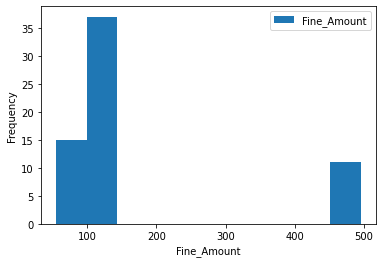

In [973]:
#Creating a plot of the Fine_amount against the violation. 
MYPLOT=df3.plot(x ='Violation',y='Fine_Amount', kind = 'hist')
MYPLOT.set_xlabel("Fine_Amount")